# Task 4.10 Part 1

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Setting path

In [4]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/11-2022 Instacart Basket Analysis'

## Importing customer dataframe (final_data)

In [5]:
# Importing data
final_data = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_merged.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hectorvargas/Desktop/Career_Foundry/11-2022 Instacart Basket Analysis/02 Data/Prepared Data/final_merged.pkl'

In [176]:
# Checking "final_data Head"
final_data.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The data frame contains two personally identifiable variables (first_name and last_name). We can drop these columns as they aren't GDPR compliance, and we don't need them for the analysis.

## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [177]:
# Creating the US regions based on "https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States"
region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [178]:
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [179]:
region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [180]:
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [181]:
# Subsetting regions column base on 'state' values
final_data.loc[final_data['state'].isin(region1), 'region'] = 'Northeast'

In [182]:
final_data.loc[final_data['state'].isin(region2), 'region'] = 'Midwest'

In [183]:
final_data.loc[final_data['state'].isin(region3), 'region'] = 'South'

In [184]:
final_data.loc[final_data['state'].isin(region4), 'region'] = 'West'

In [185]:
# Checking dateframe with to head to see if the "region was added"
final_data.head(20)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,fam_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [186]:
# DF shape
final_data.shape

(32404859, 36)

In [187]:
# Checking 'region' values counts
final_data['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [188]:
# Looking for 'spenders_fla
final_data.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'spenders_flag',
       'median_days_since_prior_order', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependents', 'fam_status', 'income', 'region'],
      dtype='object')

In [189]:
# Crossing region values with spenders_flag
pd.crosstab(final_data['region'],final_data['spenders_flag'], dropna = False)

spenders_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [190]:
# Crossing region values with loyalty_flag
pd.crosstab(final_data['region'],final_data['loyalty_flag'], dropna = False)

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [191]:
# creating activity flag to define low-high Activity
final_data.loc[final_data['max_order'] <= 5, 'activity_flag'] = 'Low Activity'

In [192]:
final_data.loc[final_data['max_order'] > 5, 'activity_flag'] = 'High Activity'

In [193]:
final_data['activity_flag']

0           High Activity
1           High Activity
2           High Activity
3           High Activity
4           High Activity
                ...      
32404854    High Activity
32404855     Low Activity
32404856     Low Activity
32404857     Low Activity
32404858     Low Activity
Name: activity_flag, Length: 32404859, dtype: object

In [194]:
# Activity_flag counts
final_data['activity_flag'].value_counts(dropna = False)

High Activity    30171424
Low Activity      2233435
Name: activity_flag, dtype: int64

In [195]:
# Excluding "low_activity" values
new_final_data = final_data.drop(final_data[final_data.max_order <= 5].index)

In [196]:
# Cheking drop
new_final_data.shape

(30171424, 37)

In [197]:
# Exporting the new sample (without "low_activity")
new_final_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_final_data.pkl'))

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [198]:
# Age values
new_final_data['age'].unique()

array([31, 69, 62, 71, 38, 41, 64, 66, 49, 60, 30, 67, 51, 50, 76, 24, 70,
       26, 22, 75, 61, 27, 58, 63, 81, 78, 32, 55, 52, 39, 18, 21, 34, 54,
       79, 73, 19, 23, 68, 44, 42, 80, 57, 37, 40, 29, 45, 20, 25, 65, 36,
       59, 46, 43, 28, 77, 47, 56, 35, 53, 72, 74, 33, 48])

In [199]:
# Creating Age Categorie
new_final_data.loc[(new_final_data['age']>=19)&(new_final_data['age']<=35),'age_category']='young adults'

In [200]:
new_final_data.loc[(new_final_data['age']>=36)&(new_final_data['age']<=55),'age_category']='middle age adults'

In [201]:
new_final_data.loc[(new_final_data['age']>=56)&(new_final_data['age']<=75),'age_category']='older adults'

In [202]:
new_final_data.loc[new_final_data['age']>76,'age_category']='senior'

In [203]:
# Output Age categorie
new_final_data['age_category'].value_counts()

middle age adults    9466456
older adults         9347159
young adults         8049766
senior               2376742
Name: age_category, dtype: int64

In [204]:
len(new_final_data['age_category'])

30171424

In [205]:
# Creating income Categorie
new_final_data.groupby('age_category').agg({'income': ['mean','min','max']})

income               
                            mean    min     max
age_category                                   
middle age adults  104909.405967  25903  592409
older adults       116169.258456  29001  593901
senior             115965.954000  29113  579169
young adults        70690.750438  25911  396364

In [206]:
new_final_data.loc[(new_final_data['income']>=10000)&(new_final_data['income']<=50000),'income_category']='lower middle income'

In [207]:
new_final_data.loc[(new_final_data['income']>=51000)&(new_final_data['income']<=100000),'income_category']='middle income'

In [208]:
new_final_data.loc[(new_final_data['income']>=110000)&(new_final_data['income']<=300000),'income_category']='upper-middle income'

In [209]:
new_final_data.loc[new_final_data['income']>310000,'income_category']='rich income'

In [210]:
new_final_data['income_category'].value_counts()

middle income          12937209
upper-middle income    11189531
lower middle income     3248834
rich income               93531
Name: income_category, dtype: int64

In [211]:
# Importing departments data sets
pd.read_csv(os.path.join(path, '02 Data','Original Data', 'departments.csv'))

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [212]:
# Family buying behavior
new_final_data.loc[(new_final_data['department_id']==18)&(new_final_data['no_of_dependents']>0),'family_status']='family with babies'

In [213]:
new_final_data.loc[(new_final_data['department_id']==8) &(new_final_data['department_id']==18)&(new_final_data['no_of_dependents']>0),'family_status']='family with children with pets'

In [214]:
new_final_data.loc[new_final_data['no_of_dependents']==0,'family_status']='family with no babies'

In [215]:
# Family buying behavior output
new_final_data['family_status'].value_counts()

family with no babies    7539213
family with babies        301653
Name: family_status, dtype: int64

## 6. Create an appropriate visualization to show the distribution of profiles.

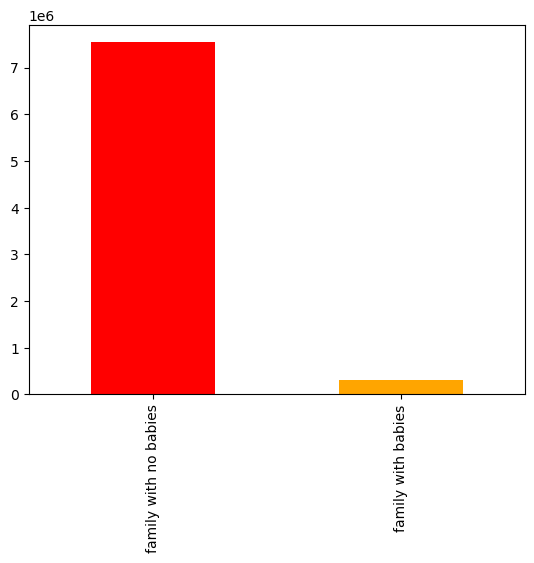

In [216]:
# Creating bar graph showing the Family buying behavior
buying_behavior=new_final_data['family_status'].value_counts().plot.bar(color=['red','orange','blue'])

#### The graph shows the purchasing behavior of families in Insacart. Most do not have babies by not buying baby products(product_id 18). This group may also have older children, but it is hard to know by not having the age of dependents or other categories/products in our data. 

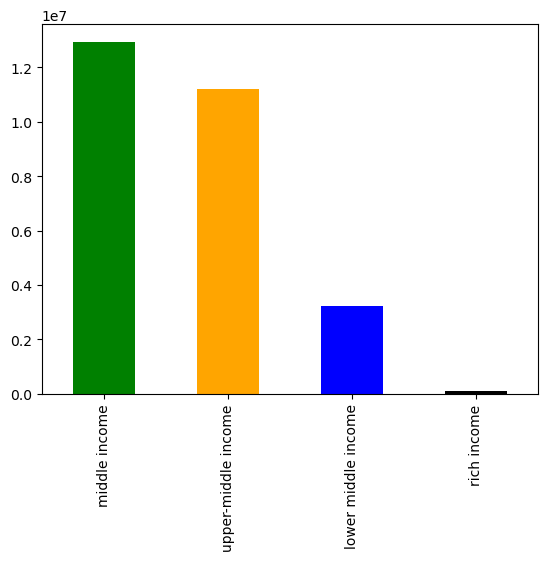

In [217]:
# Creating bar graph showing the income by age
income_by_age=new_final_data['income_category'].value_counts().plot.bar(color=['green','orange','blue', 'black'])

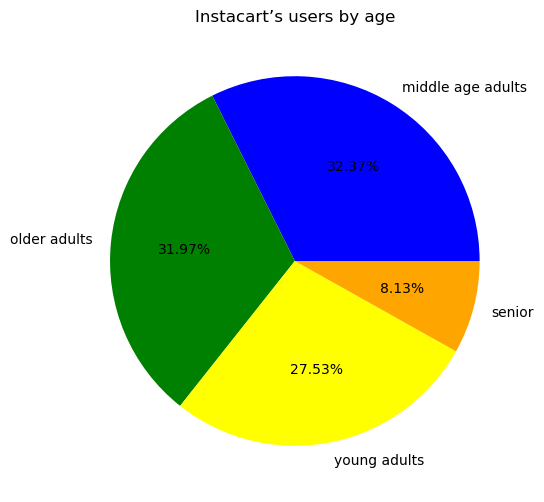

In [218]:
agepie = new_final_data['age_category'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize=(6,6), title = 'Instacart’s users by age', label='', colors =['blue', 'green','yellow', 'orange'])

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [219]:
new_final_data.groupby('age_category').agg({'income': ['mean','min','max']})

income               
                            mean    min     max
age_category                                   
middle age adults  104909.405967  25903  592409
older adults       116169.258456  29001  593901
senior             115965.954000  29113  579169
young adults        70690.750438  25911  396364

In [220]:
new_final_data.groupby('family_status').agg({'income': ['mean','min','max']})

income               
                                mean    min     max
family_status                                      
family with babies     101941.547470  26293  579169
family with no babies  100015.916102  25903  584097

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [221]:
#crosstab customer family status by region
crosstab_fam_status=pd.crosstab(new_final_data['region'],new_final_data['family_status'],dropna=False)

In [222]:
crosstab_fam_status

family_status,family with babies,family with no babies
region,,
Midwest,69849,1773970
Northeast,53641,1317139
South,102348,2516780
West,75815,1931324


In [223]:
crosstab_age_category=pd.crosstab(new_final_data['region'],new_final_data['age_category'],dropna=False)

In [224]:
crosstab_age_category

age_category,middle age adults,older adults,senior,young adults
region,,,,
Midwest,2269962,2170662,548618,1864934
Northeast,1634817,1672182,427052,1433702
South,3129884,3089586,798174,2715576
West,2431793,2414729,602898,2035554


## 9. Produce suitable charts to illustrate your results and export them in your project folder.

Text(0.5, 0, 'Region')

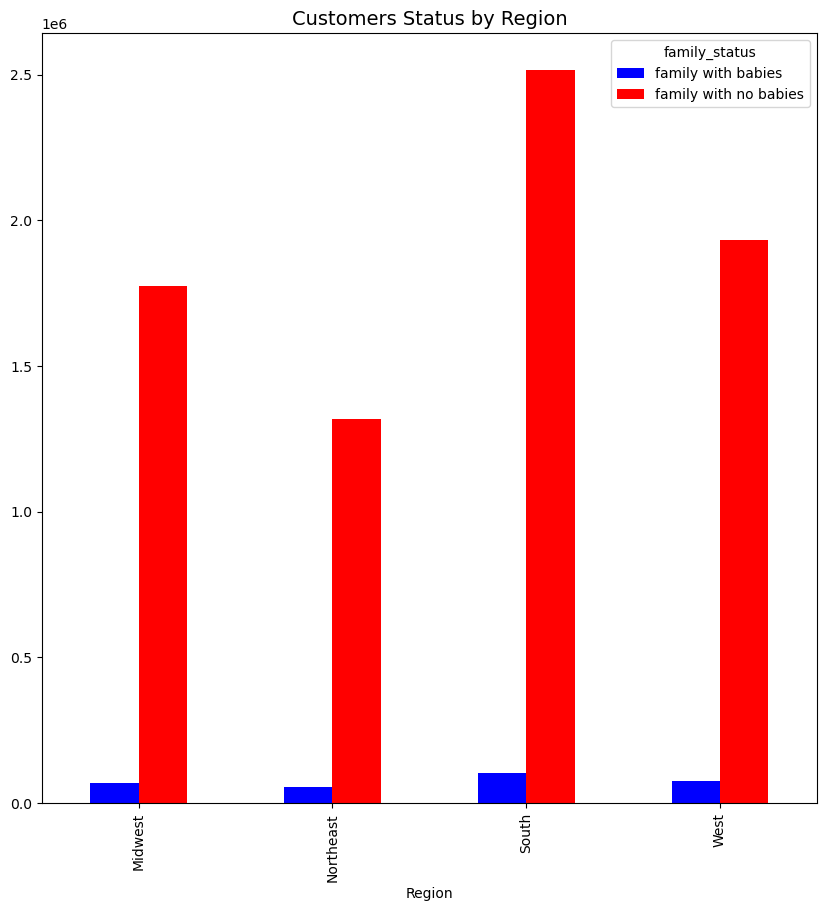

In [225]:
# Creating bar chart of family status and region
fam_status_bar = crosstab_fam_status.plot(kind = 'bar', color=['blue','red', 'yellow', 'orange'], figsize=(10,10))

plt.title('Customers Status by Region', fontsize=14)
plt.xlabel('Region')

Text(0.5, 0, 'Region')

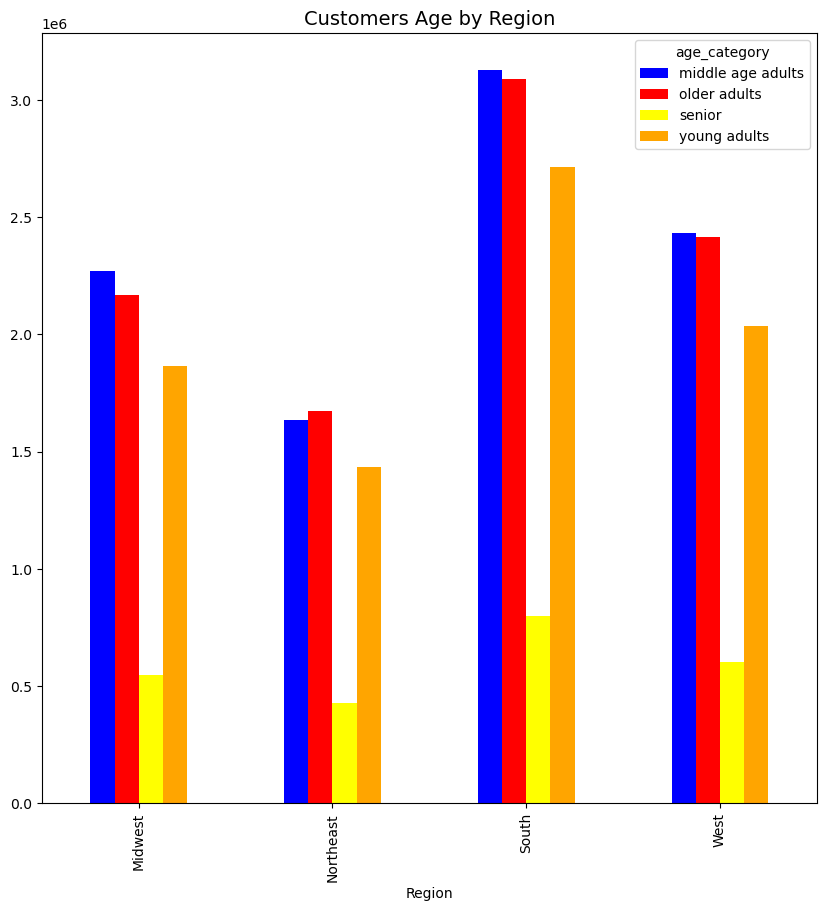

In [226]:
# Creating bar chart of age and region
age_status_bar = crosstab_age_category.plot(kind = 'bar', color=['blue','red', 'yellow', 'orange'], figsize=(10,10))

plt.title('Customers Age by Region', fontsize=14)
plt.xlabel('Region')

Text(0.5, 0, 'Age Category')

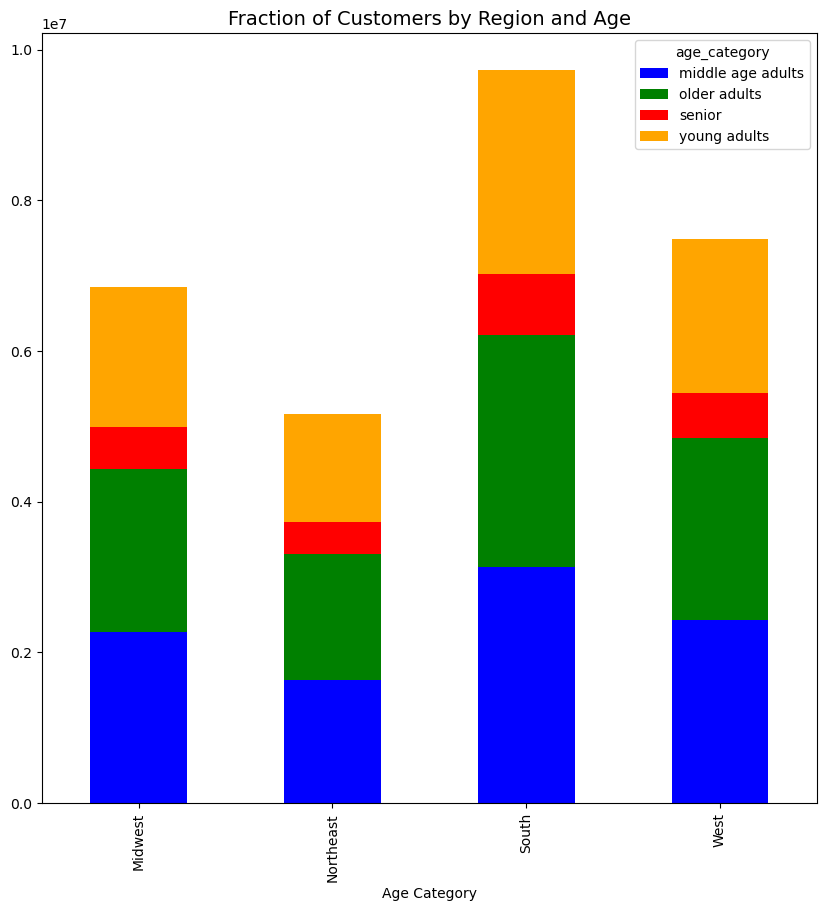

In [227]:
# creating stacked bar chart of age category and region
age_category_bar2 = crosstab_age_category.plot(kind = 'bar', color=['blue','green', 'red', 'orange'], stacked = True, figsize=(10,10))

plt.title('Fraction of Customers by Region and Age', fontsize=14)
plt.xlabel('Age Category')

In [228]:
# creating crosstab of department and workstatus
age_depart = pd.crosstab(new_final_data['department_id'], new_final_data['age_category'], dropna= False)

In [229]:
age_depart

age_category,middle age adults,older adults,senior,young adults
department_id,,,,
1,643894,639177,164326,547658
2,10453,10196,2526,9121
3,342543,337375,86693,291915
4,2783549,2750032,700540,2357769
5,43389,42699,10331,37909
6,78595,75717,19665,66842
7,787156,783337,196547,662348
8,27622,27933,7603,24705
9,250146,246686,62608,212903


In [230]:
# Importing data
products = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'department_wrangled.csv'))

In [231]:
products.head(22)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Text(0.5, 0, 'Departments_ids')

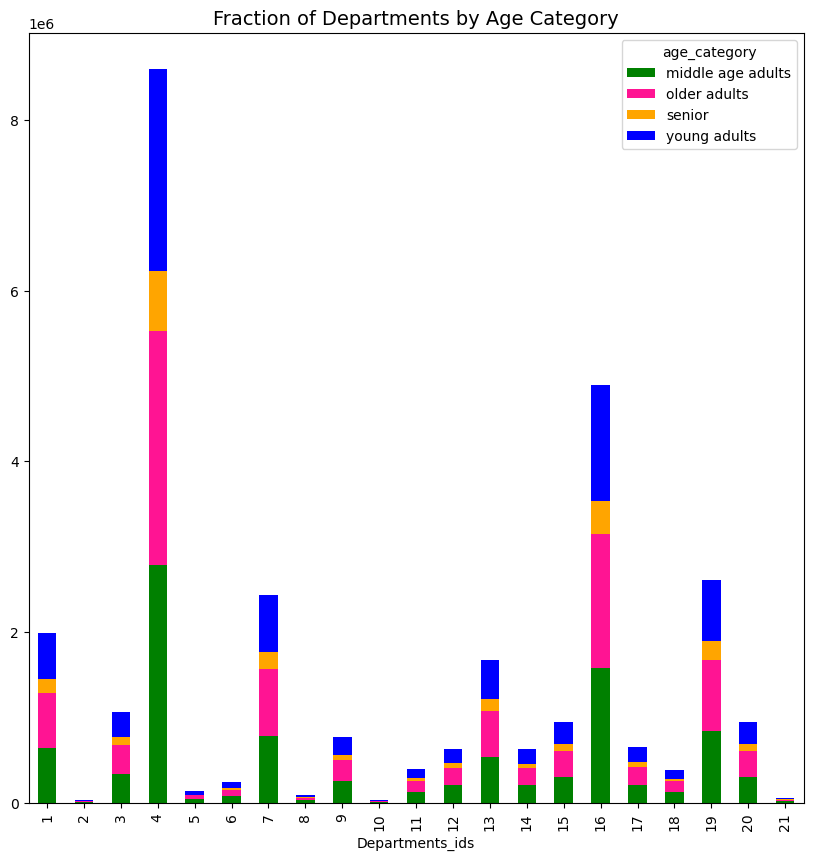

In [232]:
# Creating stacked bar chart of age category and departments_ids
age_depart_stacked = age_depart.plot(kind='bar', color=['green', 'deeppink', 'orange','blue'], stacked = True, figsize=(10,10))
plt.title('Fraction of Departments by Age Category', fontsize=14)
plt.xlabel('Departments_ids')

#### Exporting graphs

In [233]:
# Exporting buying behavior visualization
buying_behavior.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'buying_behavior.png'))

In [234]:
# Exporting income by age visualization
income_by_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'income_by_age.png'))

In [235]:
# Exporting age pie visualization
agepie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'age_pie.png'))

In [236]:
# Exporting family status visualization
fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'fam_status_bar.png'))

In [237]:
# Exporting age status visualization
age_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'age_status_bar_region.png'))

In [238]:
# Exporting family status visulization
age_category_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'age_category_bar2_region.png'))

In [239]:
# Exporting family status visuliz
age_depart_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Task', 'age_depart_stacked_region.png'))

## Tidy up your script, export your final data set, and save your notebook.

In [240]:
new_final_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Task_10_final.pkl'))